# Data Preparation

#### Below we remove all players that do not have a salary for the Salary_2021-22 year and players that show NaNs for this year. 

In [1]:
# Import needed libraries

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/kyledufrane/NHL-Salary-Predictions/main/data/forward_roster_df.csv')
df['shootsCatches'] = df['shootsCatches'].replace('L', 'Left').replace('R', 'Right')

In [3]:
ml_df = df[df['Salary_2021-22'] != 0.0]
ml_df.head()

,Unnamed: 0,fullName,id,link,jerseyNumber,code,name,type,abbreviation,Team_Number,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,timeOnIce22,assists22,goals22,pim22,shots22,games22,hits22,powerPlayGoals22,powerPlayPoints22,powerPlayTimeOnIce22,evenTimeOnIce22,penaltyMinutes22,faceOffPct22,shotPct22,gameWinningGoals22,overTimeGoals22,shortHandedGoals22,shortHandedPoints22,shortHandedTimeOnIce22,blocked22,plusMinus22,points22,shifts22,timeOnIcePerGame22,evenTimeOnIcePerGame22,shortHandedTimeOnIcePerGame22,powerPlayTimeOnIcePerGame22,ot22,shutouts22,ties22,wins22,losses22,saves22,powerPlaySaves22,shortHandedSaves22,evenSaves22,shortHandedShots22,evenShots22,powerPlayShots22,savePercentage22,goalAgainstAverage22,gamesStarted22,shotsAgainst22,goalsAgainst22,powerPlaySavePercentage22,shortHandedSavePercentage22,evenStrengthSavePercentage22,timeOnIce21,assists21,goals21,pim21,shots21,games21,hits21,powerPlayGoals21,powerPlayPoints21,powerPlayTimeOnIce21,evenTimeOnIce21,penaltyMinutes21,faceOffPct21,shotPct21,gameWinningGoals21,overTimeGoals21,shortHandedGoals21,shortHandedPoints21,shortHandedTimeOnIce21,blocked21,plusMinus21,points21,shifts21,timeOnIcePerGame21,evenTimeOnIcePerGame21,shortHandedTimeOnIcePerGame21,powerPlayTimeOnIcePerGame21,ot21,shutouts21,ties21,wins21,losses21,saves21,powerPlaySaves21,shortHandedSaves21,evenSaves21,shortHandedShots21,evenShots21,powerPlayShots21,savePercentage21,goalAgainstAverage21,gamesStarted21,shotsAgainst21,goalsAgainst21,powerPlaySavePercentage21,shortHandedSavePercentage21,evenStrengthSavePercentage21,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,ot20,shutouts20,ties20,wins20,losses20,saves20,powerPlaySaves20,shortHandedSaves20,evenSaves20,shortHandedShots20,evenShots20,powerPlayShots20,savePercentage20,goalAgainstAverage20,gamesStarted20,shotsAgainst20,goalsAgainst20,powerPlaySavePercentage20,shortHandedSavePercentage20,evenStrengthSavePercentage20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,ot19,shutouts19,ties19,wins19,losses19,saves19,powerPlaySaves19,shortHandedSaves19,evenSaves19,shortHandedShots19,evenShots19,powerPlayShots19,savePercentage19,goalAgainstAverage19,gamesStarted19,shotsAgainst19,goalsAgainst19,powerPlaySavePercentage19,shortHandedSavePercentage19,evenStrengthSavePercentage19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,ot18,shutouts18,ties18,wins18,losses18,saves18,powerPlaySaves18,shortHandedSaves18,evenSaves18,shortHandedShots18,evenShots18,powerPlayShots18,savePercentage18,goalAgainstAverage18,gamesStarted18,shotsAgainst18,goalsAgainst18,powerPlaySavePercentage18,shortHandedSavePercentage18,evenStrengthSavePercentage18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWin

In [4]:
percentage_nan = 50.0
min_count = int(((100-percentage_nan)/100)*ml_df.shape[0] + 1)

ml_df = ml_df.dropna(axis=1,
                        thresh=min_count)

In [5]:
ml_df.isna().sum()

Unnamed: 0                         0
fullName                           0
id                                 0
link                               0
jerseyNumber                       1
code                               0
name                               0
type                               0
abbreviation                       0
Team_Number                        0
birthDate                          0
currentAge                         0
birthCity                          0
birthStateProvince               123
birthCountry                       0
nationality                        0
height                             0
weight                             0
active                             0
alternateCaptain                   0
captain                            0
rookie                             0
shootsCatches                      0
rosterStatus                       0
timeOnIce22                        0
assists22                          0
goals22                            0
p

In [6]:
ml_df = ml_df.reset_index()
ml_df.head()

,index,Unnamed: 0,fullName,id,link,jerseyNumber,code,name,type,abbreviation,Team_Number,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,nationality,height,weight,active,alternateCaptain,captain,rookie,shootsCatches,rosterStatus,timeOnIce22,assists22,goals22,pim22,shots22,games22,hits22,powerPlayGoals22,powerPlayPoints22,powerPlayTimeOnIce22,evenTimeOnIce22,penaltyMinutes22,faceOffPct22,shotPct22,gameWinningGoals22,overTimeGoals22,shortHandedGoals22,shortHandedPoints22,shortHandedTimeOnIce22,blocked22,plusMinus22,points22,shifts22,timeOnIcePerGame22,evenTimeOnIcePerGame22,shortHandedTimeOnIcePerGame22,powerPlayTimeOnIcePerGame22,timeOnIce21,assists21,goals21,pim21,shots21,games21,hits21,powerPlayGoals21,powerPlayPoints21,powerPlayTimeOnIce21,evenTimeOnIce21,penaltyMinutes21,faceOffPct21,shotPct21,gameWinningGoals21,overTimeGoals21,shortHandedGoals21,shortHandedPoints21,shortHandedTimeOnIce21,blocked21,plusMinus21,points21,shifts21,timeOnIcePerGame21,evenTimeOnIcePerGame21,shortHandedTimeOnIcePerGame21,powerPlayTimeOnIcePerGame21,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,Salary_2014-15,Salary_2015-16,Salary_2016-17,Salary_2017-18,Salary_2018-19,Salary_2019-20,Salary_2020-21,Salary_2021-22
0,2,2,P.K. Subban,8474056,/api/v1/people/8474056,76.0,D,Defenseman,Defenseman,D,1,1989-05-13,32,Toronto,ON,CAN,CAN,"6' 0""",210,True,True,False,False,Right,Y,1408:48,17.0,5.0,82.0,114.0,77.0,69.0,0.0,0.0,45:05,1296:37,82.0,0.0,4.4,1.0,0.0,0.0,1.0,67:06,90.0,-8.0,22.0,1755.0,18:17,16:50,00:52,00:35,983:47,14.0,5.0,26.0,99.0,44.0,41.0,2.0,5.0,89:48,827:53,26.0,0.0,5.1,0.0,0.0,0.0,0.0,66:06,46.0,-16.0,19.0,1152.0,22:21,18:48,01:30,02:02,1504:25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160:14,1232:41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111:30,90.0,-21.0,18.0,1883.0,22:07,18:07,01:38,02:21,1427:51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163:07,1166:17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98:27,75.0,5.0,31.0,1731.0,22:39,18:30,01:33,02:35,1977:24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253:23,

#### Looking at the above dataframe we can identify the below column names as impractical features. 

In [7]:
manual_drop = [
    'fullName', # Our model will be stat based
    'id', # The NHL Id column - for us this is a generic field
    'jerseyNumber', # The number on someones back will not have any effect on performance
    'code', # This is a duplicate column that will be filled with the 'type' column
    'type', # This is a duplicate column that will be filled with the 'type' column
    'abbreviation', # This is a duplicate column that will be filled with the 'type' column
    'Team_Number', # Generic  field   
    'link', # URL substring for player identification
    'Unnamed: 0',
    'active', # Denotes if a player is active or not - data only contains one value 
    'rosterStatus', # Denotes if a player is rostered
    'nationality', # Duplicate to nationality
]

ml_df.drop(manual_drop, axis=1,inplace=True)

In [8]:
ml_df.head()

,index,name,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,height,weight,alternateCaptain,captain,rookie,shootsCatches,timeOnIce22,assists22,goals22,pim22,shots22,games22,hits22,powerPlayGoals22,powerPlayPoints22,powerPlayTimeOnIce22,evenTimeOnIce22,penaltyMinutes22,faceOffPct22,shotPct22,gameWinningGoals22,overTimeGoals22,shortHandedGoals22,shortHandedPoints22,shortHandedTimeOnIce22,blocked22,plusMinus22,points22,shifts22,timeOnIcePerGame22,evenTimeOnIcePerGame22,shortHandedTimeOnIcePerGame22,powerPlayTimeOnIcePerGame22,timeOnIce21,assists21,goals21,pim21,shots21,games21,hits21,powerPlayGoals21,powerPlayPoints21,powerPlayTimeOnIce21,evenTimeOnIce21,penaltyMinutes21,faceOffPct21,shotPct21,gameWinningGoals21,overTimeGoals21,shortHandedGoals21,shortHandedPoints21,shortHandedTimeOnIce21,blocked21,plusMinus21,points21,shifts21,timeOnIcePerGame21,evenTimeOnIcePerGame21,shortHandedTimeOnIcePerGame21,powerPlayTimeOnIcePerGame21,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,timeOnIce16,assists16,goals16,pim16,shots16,games16,hits16,powerPlayGoals16,powerPlayPoints16,powerPlayTimeOnIce16,evenTimeOnIce16,penaltyMinutes16,faceOffPct16,shotPct16,gameWinningGoals16,overTimeGoals16,shortHandedGoals16,shortHandedPoints16,shortHandedTimeOnIce16,blocked16,plusMinus16,points16,shifts16,timeOnIcePerGame16,evenTimeOnIcePerGame16,shortHandedTimeOnIcePerGame16,powerPlayTimeOnIcePerGame16,Salary_2014-15,Salary_2015-16,Salary_2016-17,Salary_2017-18,Salary_2018-19,Salary_2019-20,Salary_2020-21,Salary_2021-22
0,2,Defenseman,1989-05-13,32,Toronto,ON,CAN,"6' 0""",210,True,False,False,Right,1408:48,17.0,5.0,82.0,114.0,77.0,69.0,0.0,0.0,45:05,1296:37,82.0,0.0,4.4,1.0,0.0,0.0,1.0,67:06,90.0,-8.0,22.0,1755.0,18:17,16:50,00:52,00:35,983:47,14.0,5.0,26.0,99.0,44.0,41.0,2.0,5.0,89:48,827:53,26.0,0.0,5.1,0.0,0.0,0.0,0.0,66:06,46.0,-16.0,19.0,1152.0,22:21,18:48,01:30,02:02,1504:25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160:14,1232:41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111:30,90.0,-21.0,18.0,1883.0,22:07,18:07,01:38,02:21,1427:51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163:07,1166:17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98:27,75.0,5.0,31.0,1731.0,22:39,18:30,01:33,02:35,1977:24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253:23,1507:00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217:01,90.0,18.0,59.0,2323.0,24:06,18:22,02:38,03:05,1610:40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172:00,1300:43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,

#### Next we have the birthStateProvince with 140 NA values. We will fill this column with the string 'unknown'.

In [9]:
def nat_cat(nat):
  if nat != 'CAN' and nat != 'USA':
    nat = 'OTHER'
  return nat

ml_df.birthCountry = ml_df.birthCountry.apply(nat_cat)

In [10]:
ml_df['birthCountry'].value_counts()

CAN      158
OTHER    123
USA      121
Name: birthCountry, dtype: int64

In [11]:
pd.DataFrame(ml_df.isnull().mean() * 100).sort_values(0, ascending=False)

,0
shortHandedGoals16,44.776119
hits16,44.776119
powerPlayPoints16,44.776119
powerPlayTimeOnIce16,44.776119
evenTimeOnIce16,44.776119
penaltyMinutes16,44.776119
faceOffPct16,44.776119
shotPct16,44.776119
gameWinningGoals16,44.776119
overTimeGoals16,44.776119


In [12]:
for col in ml_df.columns:
    if '14' in col or '15' in col or '16' in col:
        ml_df.drop(col, axis=1, inplace=True)

In [13]:
salary_columns = [col for col in ml_df.columns if 'Salary' in col and '2021' not in col]

In [14]:
ml_df = ml_df.drop(salary_columns, axis=1)

In [15]:
pd.DataFrame(ml_df.isnull().mean() * 100).sort_values(0, ascending=False)

,0
powerPlayPoints17,33.333333
gameWinningGoals17,33.333333
timeOnIce17,33.333333
assists17,33.333333
goals17,33.333333
pim17,33.333333
shots17,33.333333
games17,33.333333
hits17,33.333333
powerPlayGoals17,33.333333



#### To start with our data preparation, we have eight columns that are currently in the time format mm:ss. Below we start by identifying all of these columns and storing them in a list using a for loop. Again, we battle the suffix's we added while merging our tables.

In [16]:
for col in ml_df.columns:
    if 'timeOnIce' in col or 'TimeOnIce' in col:
        ml_df[col] = ml_df[col].astype(str)
        ml_df[col] = ml_df[col].apply(lambda x: x.replace(':', '.'))
        ml_df[col] = ml_df[col].astype(float)

#### Next we create a for loop to replace our values of ':' with '.' and creating a float object for our model to interpret. 

#### Next, our height column denotes a player being 6'1" which is not interpretable through our model building process. Below we convert player heights from feet to inches. 

In [17]:
def height_inches(ht):
  ft, inches = ht.split()
  ft = ft.replace('\'','')
  inches = inches.replace('\"','')
  return 12*float(ft)+float(inches)

ml_df.height_inches = ml_df.height.apply(height_inches)
ml_df.head()

,index,name,birthDate,currentAge,birthCity,birthStateProvince,birthCountry,height,weight,alternateCaptain,captain,rookie,shootsCatches,timeOnIce22,assists22,goals22,pim22,shots22,games22,hits22,powerPlayGoals22,powerPlayPoints22,powerPlayTimeOnIce22,evenTimeOnIce22,penaltyMinutes22,faceOffPct22,shotPct22,gameWinningGoals22,overTimeGoals22,shortHandedGoals22,shortHandedPoints22,shortHandedTimeOnIce22,blocked22,plusMinus22,points22,shifts22,timeOnIcePerGame22,evenTimeOnIcePerGame22,shortHandedTimeOnIcePerGame22,powerPlayTimeOnIcePerGame22,timeOnIce21,assists21,goals21,pim21,shots21,games21,hits21,powerPlayGoals21,powerPlayPoints21,powerPlayTimeOnIce21,evenTimeOnIce21,penaltyMinutes21,faceOffPct21,shotPct21,gameWinningGoals21,overTimeGoals21,shortHandedGoals21,shortHandedPoints21,shortHandedTimeOnIce21,blocked21,plusMinus21,points21,shifts21,timeOnIcePerGame21,evenTimeOnIcePerGame21,shortHandedTimeOnIcePerGame21,powerPlayTimeOnIcePerGame21,timeOnIce20,assists20,goals20,pim20,shots20,games20,hits20,powerPlayGoals20,powerPlayPoints20,powerPlayTimeOnIce20,evenTimeOnIce20,penaltyMinutes20,faceOffPct20,shotPct20,gameWinningGoals20,overTimeGoals20,shortHandedGoals20,shortHandedPoints20,shortHandedTimeOnIce20,blocked20,plusMinus20,points20,shifts20,timeOnIcePerGame20,evenTimeOnIcePerGame20,shortHandedTimeOnIcePerGame20,powerPlayTimeOnIcePerGame20,timeOnIce19,assists19,goals19,pim19,shots19,games19,hits19,powerPlayGoals19,powerPlayPoints19,powerPlayTimeOnIce19,evenTimeOnIce19,penaltyMinutes19,faceOffPct19,shotPct19,gameWinningGoals19,overTimeGoals19,shortHandedGoals19,shortHandedPoints19,shortHandedTimeOnIce19,blocked19,plusMinus19,points19,shifts19,timeOnIcePerGame19,evenTimeOnIcePerGame19,shortHandedTimeOnIcePerGame19,powerPlayTimeOnIcePerGame19,timeOnIce18,assists18,goals18,pim18,shots18,games18,hits18,powerPlayGoals18,powerPlayPoints18,powerPlayTimeOnIce18,evenTimeOnIce18,penaltyMinutes18,faceOffPct18,shotPct18,gameWinningGoals18,overTimeGoals18,shortHandedGoals18,shortHandedPoints18,shortHandedTimeOnIce18,blocked18,plusMinus18,points18,shifts18,timeOnIcePerGame18,evenTimeOnIcePerGame18,shortHandedTimeOnIcePerGame18,powerPlayTimeOnIcePerGame18,timeOnIce17,assists17,goals17,pim17,shots17,games17,hits17,powerPlayGoals17,powerPlayPoints17,powerPlayTimeOnIce17,evenTimeOnIce17,penaltyMinutes17,faceOffPct17,shotPct17,gameWinningGoals17,overTimeGoals17,shortHandedGoals17,shortHandedPoints17,shortHandedTimeOnIce17,blocked17,plusMinus17,points17,shifts17,timeOnIcePerGame17,evenTimeOnIcePerGame17,shortHandedTimeOnIcePerGame17,powerPlayTimeOnIcePerGame17,Salary_2021-22
0,2,Defenseman,1989-05-13,32,Toronto,ON,CAN,"6' 0""",210,True,False,False,Right,1408.48,17.0,5.0,82.0,114.0,77.0,69.0,0.0,0.0,45.05,1296.37,82.0,0.0,4.4,1.0,0.0,0.0,1.0,67.06,90.0,-8.0,22.0,1755.0,18.17,16.50,0.52,0.35,983.47,14.0,5.0,26.0,99.0,44.0,41.0,2.0,5.0,89.48,827.53,26.0,0.0,5.1,0.0,0.0,0.0,0.0,66.06,46.0,-16.0,19.0,1152.0,22.21,18.48,1.30,2.02,1504.25,11.0,7.0,79.0,151.0,68.0,88.0,2.0,6.0,160.14,1232.41,79.0,0.0,4.6,3.0,0.0,0.0,0.0,111.30,90.0,-21.0,18.0,1883.0,22.07,18.07,1.38,2.21,1427.51,22.0,9.0,60.0,168.0,63.0,56.0,2.0,10.0,163.07,1166.17,60.0,0.0,5.36,1.0,0.0,1.0,1.0,98.27,75.0,5.0,31.0,1731.0,22.39,18.30,1.33,2.35,1977.24,43.0,16.0,82.0,207.0,82.0,111.0,5.0,25.0,253.23,1507.00,82.0,33.33,7.73,2.0,0.0,0.0,1.0,217.01,90.0,18.0,59.0,2323.0,24.06,18.22,2.38,3.05,1610.40,30.0,10.0,44.0,142.0,66.0,78.0,3.0,16.0,172.00,1300.43,44.0,0.0,7.04,2.0,0.0,0.0,1.0,137.57,104.0,-8.0,40.0,1860.0,24.24,19.42,2.05,2.36,8000000.0
1,4,Defenseman,1993-09-27,27,Regina,SK,CAN,"6' 1""",206,False,False,False,Left,521.14,4.0,0.0,2.0,26.0,37.0,32.0,0.0,0.0,1.03,480.18,2.0,0.0,0.0,0.0,0.0,0.0,1.0,39.53,41.0,-3.0,4.0,721.0,14.05,12.58,1.04,0.01,893.28,14.0,0.0,8.0,29.0,48.0,38.0,0.0,0.0,3.12,809.42,8.0,0.0,0.0,0.0,0.0,0.0,0.0,80.34,73.0,3.0,14.0,1099.0,18.36,16.52,1.40,0.04,538.48,7.0,2.0,4.0,32.0,27.0,12.0,0.0,2.0,23.15,460.25,4.0,0.0,6.3,0.0,0.0,0.0,0.0,55.08,50.0,-9.0,9.0,708.0,19.57,17.03

In [18]:
ml_viz = ml_df.select_dtypes(['int', 'float'])
ml_viz_col = [col for col in ml_viz.columns if '22' in col]

ml_viz = ml_viz[ml_viz_col]

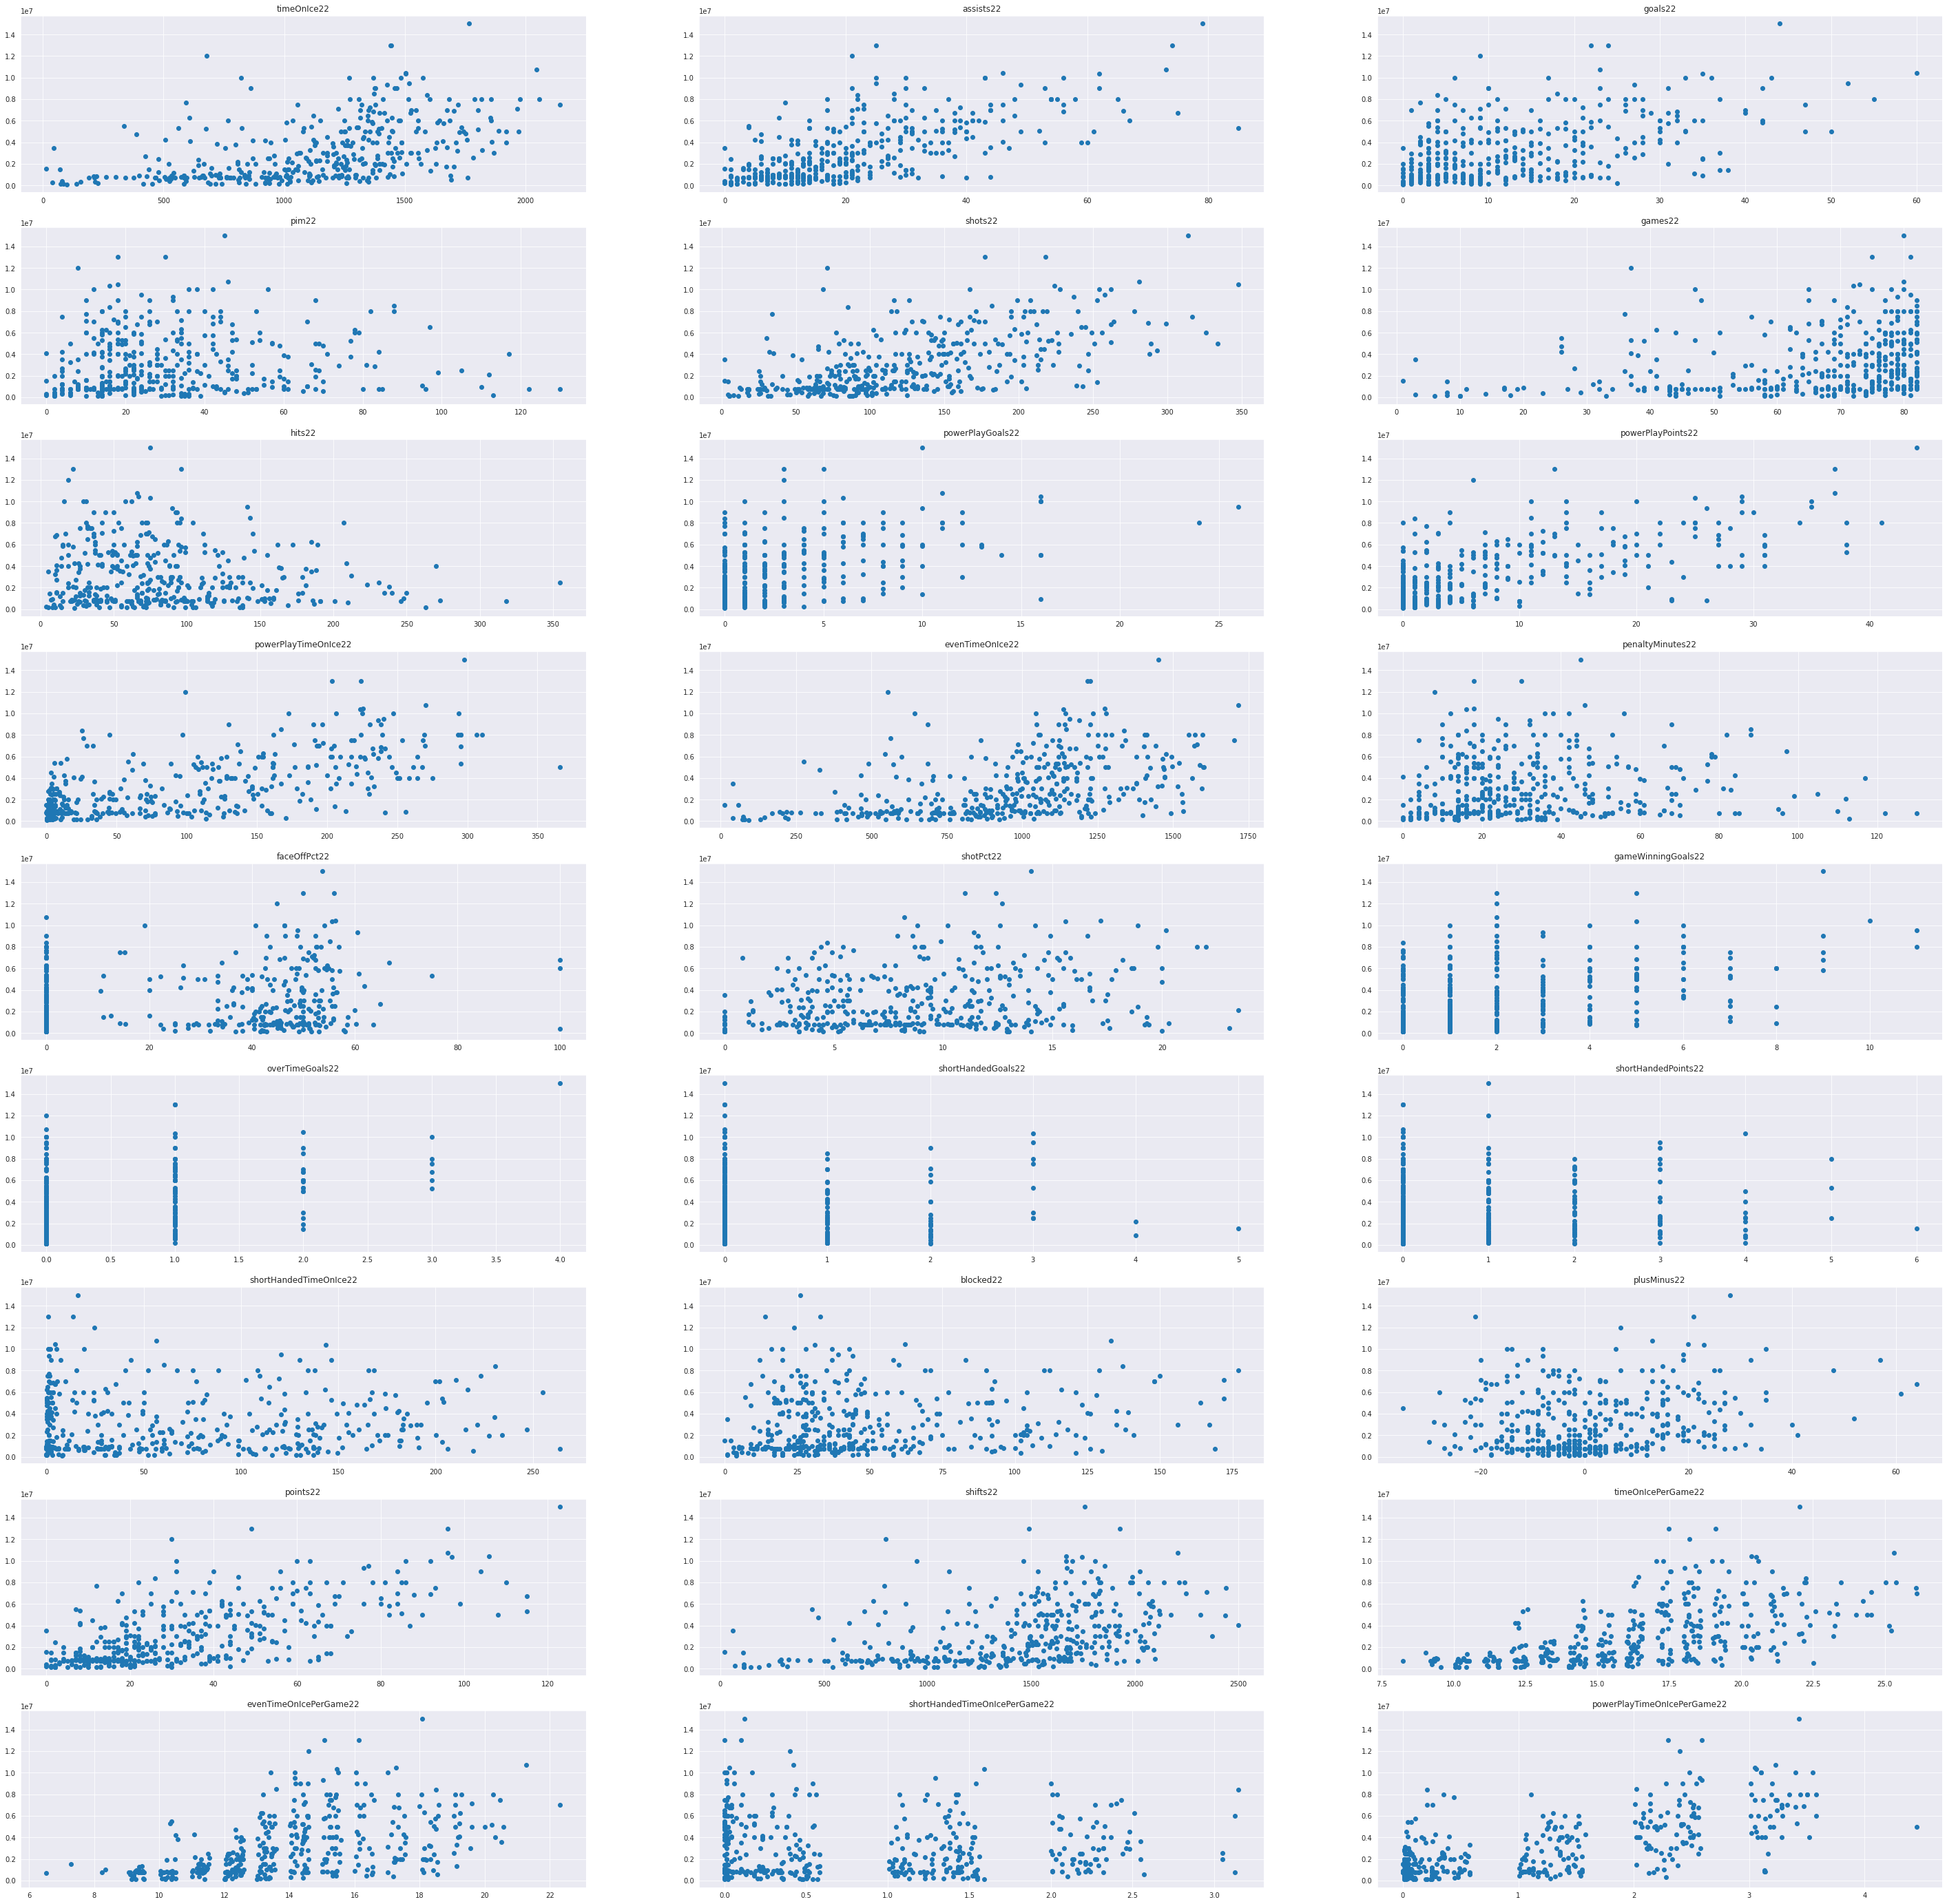

In [19]:
fig, ax = plt.subplots(9,3, figsize=(50,50))
row = 0
col_ = 0
for col in ml_viz.columns:
    if col != 'Salary_2021-22':
        ax[row, col_].scatter(ml_df[col], ml_df['Salary_2021-22'])
        ax[row, col_].set_title(col)

        col_ += 1
        if col_ > 2:
            row += 1
            col_ = 0

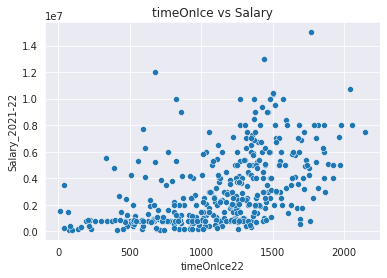

In [20]:
sns.scatterplot(ml_df['timeOnIce22'], ml_df['Salary_2021-22'])
plt.title('timeOnIce vs Salary')
plt.savefig('images/timeOnIce22');

#### Interesting insights, there doesn't seem to be a positive correlation regarding shortHandedTimeOnIce but definite positive correlation between other timeOnIce categories. Excluding timeOnIce the strongest categories showing a positive correlation with salary are points, goals, and assists. 

#### Lets take a look at some of our categorical variables to see if these shows us any other insights.

TypeError: 'value' must be an instance of str or bytes, not a float

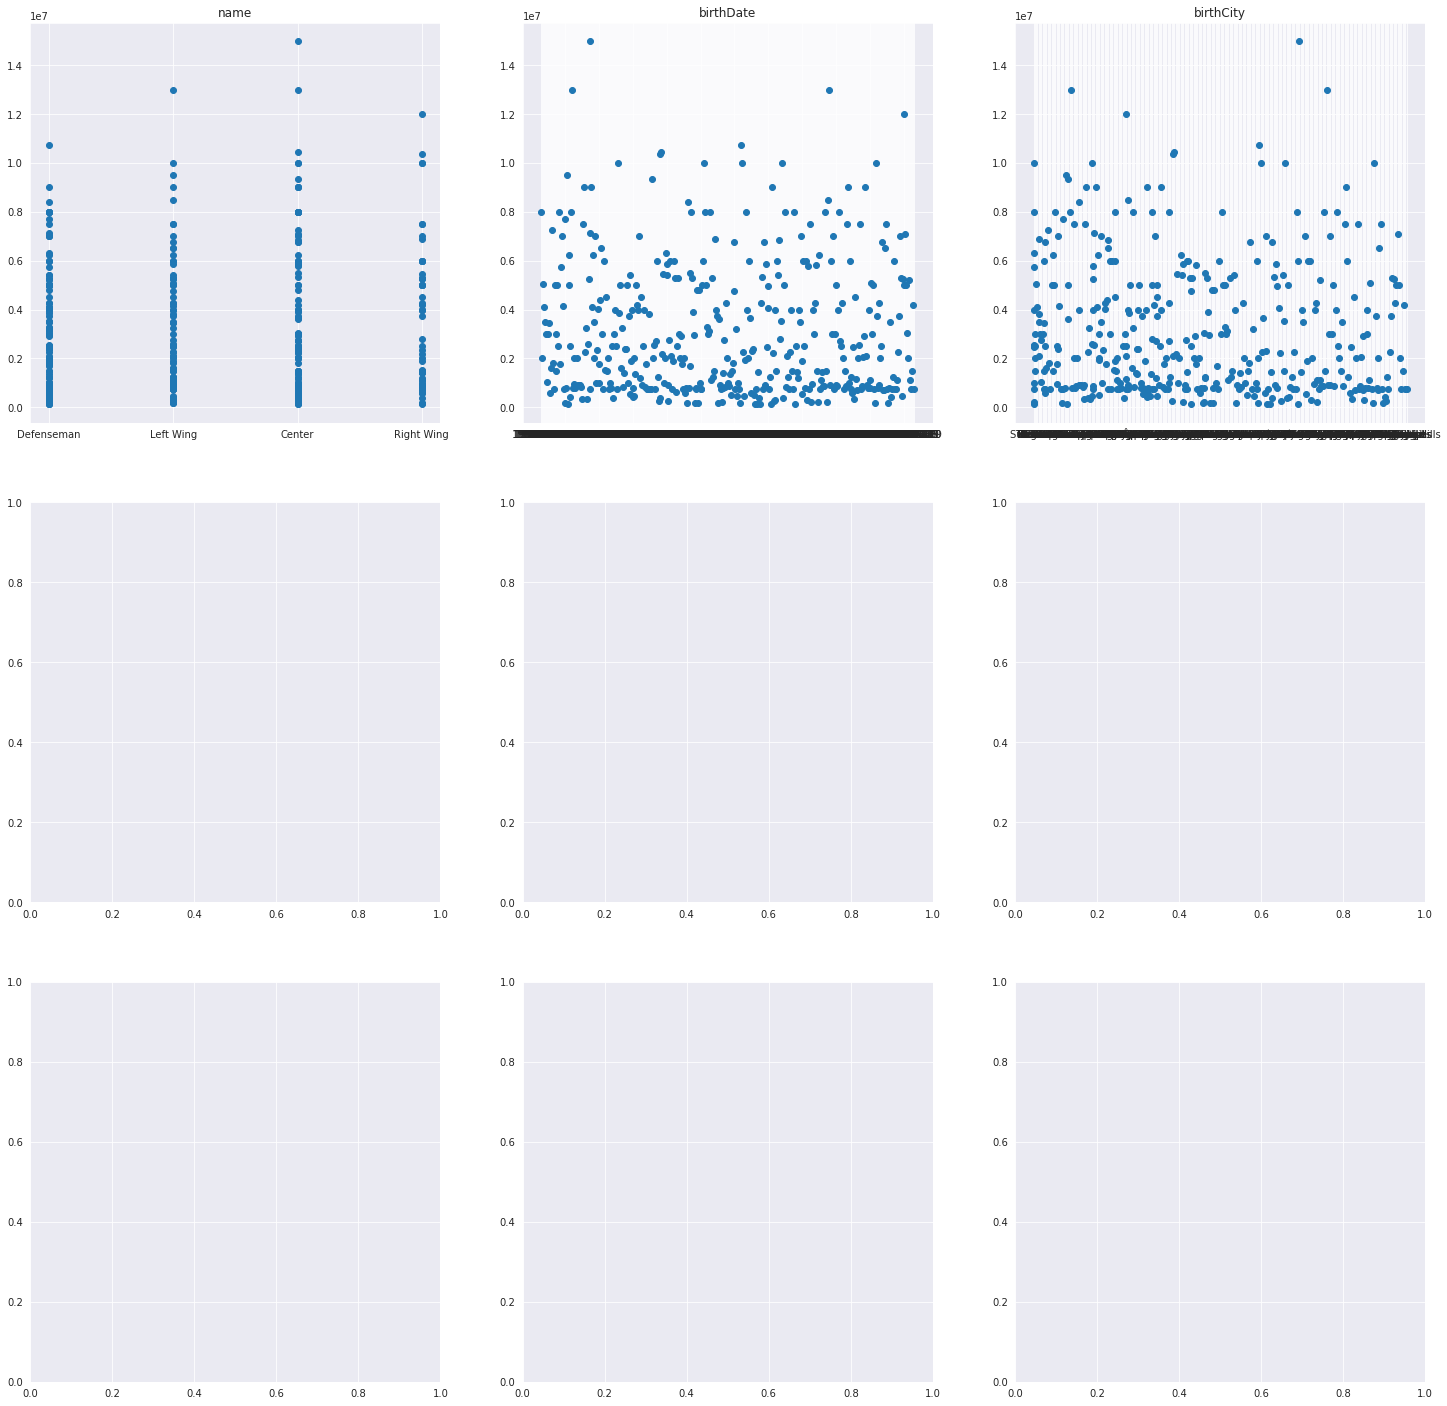

In [21]:
fig, ax = plt.subplots(3,3, figsize=(25,25))
row = 0
col_=0
for col in ml_df.select_dtypes('object').columns:
    ax[row, col_].scatter(ml_df[col], ml_df['Salary_2021-22'])
    ax[row, col_].set_title(col)

    col_ += 1
    if col_ > 2:
        row += 1
        col_ = 0

#### This doesn't give us as much information as our numerical values but an interesting observation is that on average left handed shots look to be paid more than right handed shots. Also, it seems on average that US and Canadian nationalities get paid more than other countrys. Lets look at this further.

#### Below we can see that CHE (Switzerland), CHE (Czech), and SWE (Sweden) look to be the highest paid countries based on our top six countries that have a sizeable amount of players in the NHL.  

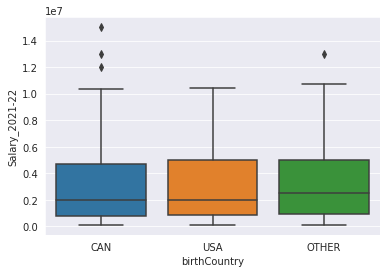

In [22]:
sns.boxplot(ml_df['birthCountry'], ml_df['Salary_2021-22']);

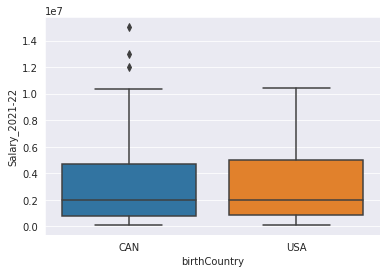

In [23]:
top_count_nations = ml_df[ml_df['birthCountry'].isin(['CAN', 'USA', 'SWE', 'RUS', 'FIN', 'CZE'])]
sns.boxplot(top_count_nations['birthCountry'], top_count_nations['Salary_2021-22'])
plt.savefig('images/salaries_boxplot');

In [24]:
top_count_nations.groupby('birthCountry')['Salary_2021-22'].mean().sort_values(ascending=False)

birthCountry
USA    3.107310e+06
CAN    3.022886e+06
Name: Salary_2021-22, dtype: float64

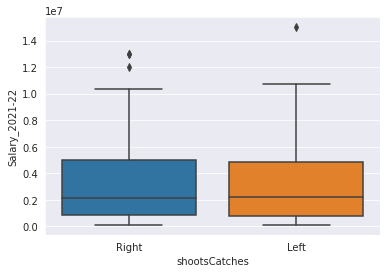

In [25]:
sns.boxplot(ml_df['shootsCatches'], ml_df['Salary_2021-22'])
plt.savefig('images/shootsCatches_boxplot');

In [26]:
ml_df.to_csv('data/ml_cleaned_forward_players_df.csv')